# HR Analytics Project

#### Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### HR Analytics

#### Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### Attrition in HR

#### Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.

#### How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question we will write the code and try to understand the process step by step.

### Attrition affecting Companies

#### A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset
df=pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
#shape
df.shape

(1470, 35)

dataset contain 1470 rows and 35 columns

In [4]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
#check null
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

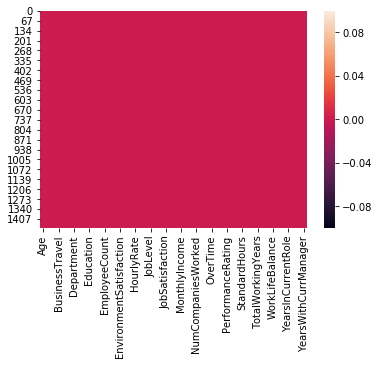

In [7]:
sns.heatmap(df.isnull())

In [8]:
#check datatypes
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

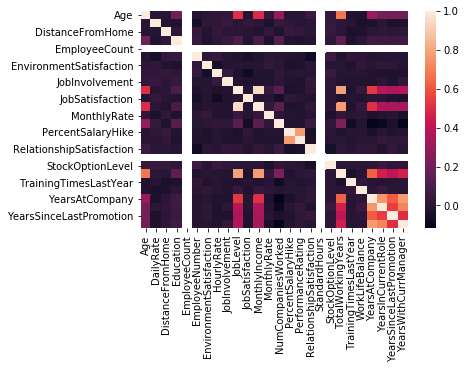

In [9]:
#corr
sns.heatmap(df.corr())

In [10]:
#lets analyze target
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

#### we can see its imbalance dataset that need to be treated

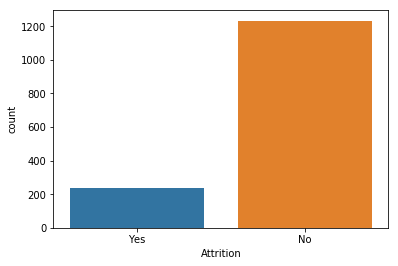

In [11]:
sns.countplot('Attrition',data=df)

In [12]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


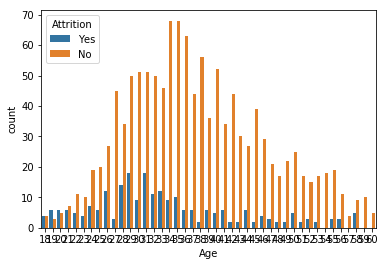

In [13]:
sns.countplot('Age',hue='Attrition',data=df)

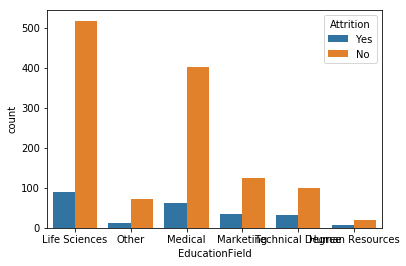

In [14]:
sns.countplot('EducationField',hue='Attrition',data=df)

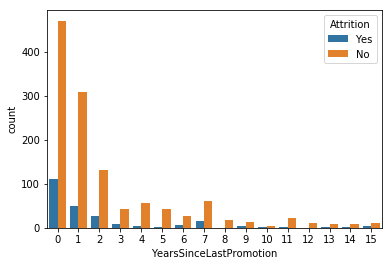

In [15]:
sns.countplot('YearsSinceLastPromotion',hue='Attrition',data=df)

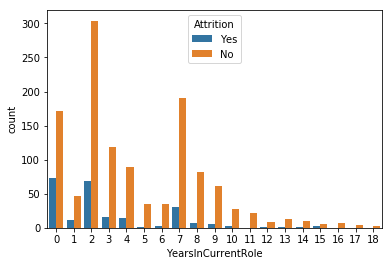

In [16]:
sns.countplot('YearsInCurrentRole',hue='Attrition',data=df)

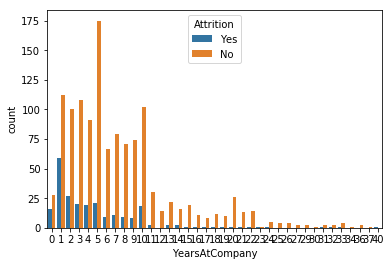

In [17]:
sns.countplot('YearsAtCompany',hue='Attrition',data=df)

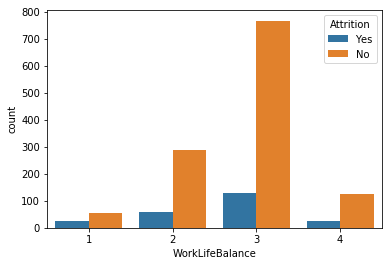

In [18]:
sns.countplot('WorkLifeBalance',hue='Attrition',data=df)

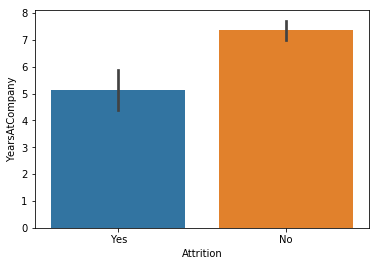

In [19]:
# average working years of the employee who left and wh stayed
sns.barplot(x="Attrition",y="YearsAtCompany",data=df)
plt.show()
# so here we get what is the average number of years employee is staying in the company before leaving

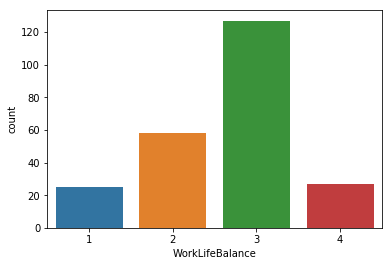

In [20]:
#lets chcek the work life balance with attrition
sns.countplot(x="WorkLifeBalance",data=df.loc[df["Attrition"]=="Yes"])
plt.show()

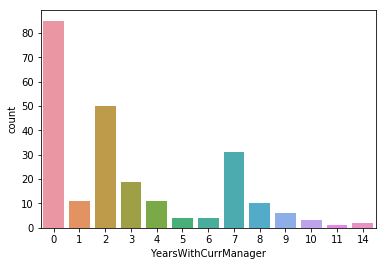

In [21]:
sns.countplot(x="YearsWithCurrManager",data=df.loc[df["Attrition"]=="Yes"])
plt.show()
#here we came to know that if years working wth current manager is 0 then attrition was very high
#Also after 2 years of working significant amut of people left
#so it can be new project they mved to they dint like job role or something else

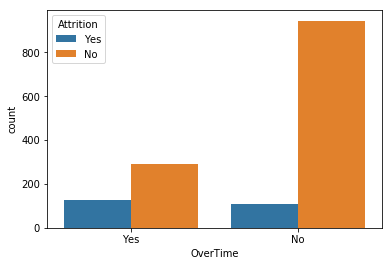

In [22]:
#Lets compare check the proportion of attrition based on overtime
sns.countplot(x="OverTime",data=df,hue="Attrition")
plt.show()
#Below if graph clearly shows if overtime is there then attrition proportion is higher

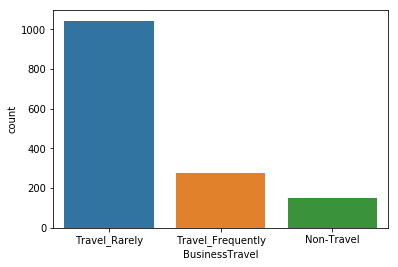

In [23]:
sns.countplot('BusinessTravel',data=df)

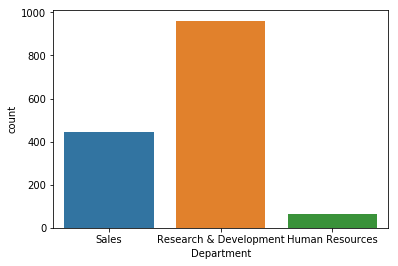

In [24]:
sns.countplot('Department',data=df)

In [25]:
#Lets drop EmployeeCount column
df.drop(columns=["EmployeeCount","StandardHours","Over18","EmployeeNumber"],inplace=True)

In [26]:
#lets chcek the skewness in the dataset
print(df.skew())
print("Total count of numeric features: ",len(df.skew()))
print("count of features which are significantly skewed: ",len(df.skew().loc[abs(df.skew())>0.5]))

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64
Total count of numeric features:  23
count of features which are significantly skewed:  14


In [27]:
#lets seprate the input and output column
x=df.drop(columns=["Attrition"])
y=df[["Attrition"]]

In [28]:
#lets treat the skewness in the input dataset
import numpy as np
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [29]:
#Lets again check the skewness
print(x.skew())
print("Total count of numeric features: ",len(x.skew()))
print("count of features which are significantly skewed: ",len(x.skew().loc[abs(x.skew())>0.5]))
#Based on below o/p we can say we have reduced significantly skewed features from 14 to 3

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
WorkLifeBalance             0.301318
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64
Total count of numeric features:  23
count of features which are significantly skewed:  3


In [30]:
#Lets count the number of columns of object datatype
print(x.dtypes.loc[x.dtypes=="object"])

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
OverTime          object
dtype: object


In [31]:
#we need to convert above columns to 1 and 0 using pd.get_dummies
x=pd.get_dummies(x,drop_first=True)

In [32]:
#Lets bring features to common scale as we will use logistic regression also
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)


In [33]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

C:\Users\CG-DTE\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\CG-DTE\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1, 0, 1, ..., 0, 0, 0])

In [34]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

C:\Users\CG-DTE\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [35]:
x.shape,y.shape

((2466, 44), (2466,))

In [36]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
def max_aucroc_score(clf,x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        ("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier()]
for m in model:
    max_aucroc_score(m,x,y)
    print(m)
    print("Mean auc_roc score for: ",m,cross_val_score(m,x,y,cv=5,scoring="roc_auc").mean())
    print("standard deviation in auc_roc score for : ",m,cross_val_score(m,x,y,cv=5,scoring="roc_auc").std())
    print(cross_val_score(m,x,y,cv=5,scoring="roc_auc"))
    print('*************************************************************************************************')
    


max auc roc score corresponding to  68  is  0.8461538461538461
LogisticRegression()
Mean auc_roc score for:  LogisticRegression() 0.8797163073500951
standard deviation in auc_roc score for :  LogisticRegression() 0.010579915891055947
[0.87201888 0.88874626 0.87223923 0.86967183 0.89590534]
*************************************************************************************************
max auc roc score corresponding to  74  is  0.8947368421052632
DecisionTreeClassifier()
Mean auc_roc score for:  DecisionTreeClassifier() 0.8516490569763997
standard deviation in auc_roc score for :  DecisionTreeClassifier() 0.06835647869434107
[0.71862348 0.89844804 0.86596063 0.87846022 0.8906142 ]
*************************************************************************************************
max auc roc score corresponding to  64  is  0.9534412955465588
SVC()
Mean auc_roc score for:  SVC() 0.9805473189548071
standard deviation in auc_roc score for :  SVC() 0.008809607769943415
[0.96323493 0.98770613

In [38]:
#Lets use random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 100}

In [39]:

#Lets use random forest classifier
#Lets print auc roc score and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
lg = RandomForestClassifier(n_estimators=500)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print('roc_auc:\n',roc_auc_score(y_test,y_pred))

print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))
print('classification_report:\n',classification_report(y_test,y_pred))




roc_auc:
 0.9348688524590163
confusion_matrix:
 [[241   9]
 [ 23 221]]
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       250
           1       0.96      0.91      0.93       244

    accuracy                           0.94       494
   macro avg       0.94      0.93      0.94       494
weighted avg       0.94      0.94      0.94       494



In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[241   9]
 [ 23 221]]
f1 score is :  0.9324894514767932
classification report 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       250
           1       0.96      0.91      0.93       244

    accuracy                           0.94       494
   macro avg       0.94      0.93      0.94       494
weighted avg       0.94      0.94      0.94       494

AUC ROC Score:  0.9348688524590163


In [41]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lg,x,y,cv=5,scoring="roc_auc"))

[0.95794063 0.99899608 0.99816497 0.99880682 0.99973668]


In [42]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1


In [43]:
#Lets save this model using joblib
#Lets save the above model
from joblib import dump, load
dump(lg, 'hr_analytics.joblib') 


['hr_analytics.joblib']